In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/campaign_responses.csv')
df = pd.read_csv('/content/refined_mobile_prices.csv')
df1 = pd.read_csv('/content/train.csv')
df2 = pd.read_csv('/content/test.csv')

**showing imbalanced data in market campaign and also mobile price**

<ipython-input-6-6ccdb5d360a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='responded', palette='viridis')


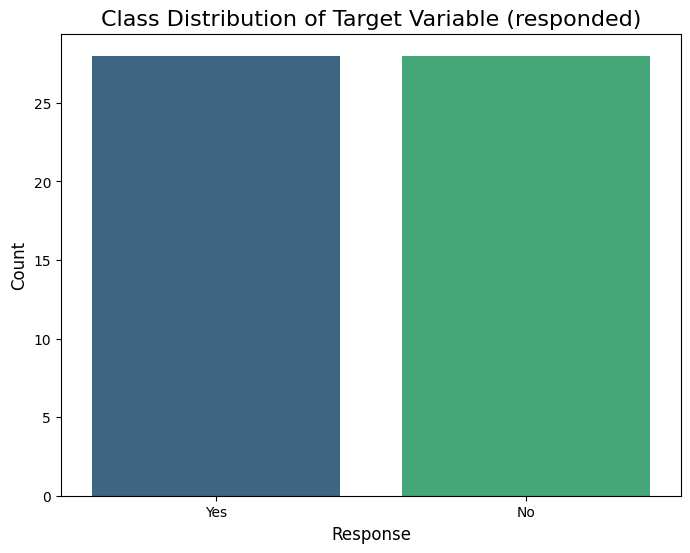

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution as a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='responded', palette='viridis')
plt.title('Class Distribution of Target Variable (responded)', fontsize=16)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [7]:
# Calculate percentage distribution of the target column
target_column = 'responded'  # Replace with your actual target column name
distribution = data[target_column].value_counts(normalize=True) * 100

# Display the distribution
print("Percentage distribution of target column:")
print(distribution)

# Check for imbalance
threshold = 20  # Example threshold for imbalance (modify as needed)
if any(distribution < threshold):
    print("\nThe dataset is imbalanced because one or more classes have less than {}% of the data.".format(threshold))
else:
    print("\nThe dataset is balanced.")



Percentage distribution of target column:
responded
Yes    50.0
No     50.0
Name: proportion, dtype: float64

The dataset is balanced.


In [19]:
# Calculate percentage distribution of the target column
target_column = 'price_range'  # Replace with your actual target column name
distribution = df[target_column].value_counts(normalize=True) * 100

# Display the distribution
print("Percentage distribution of target column:")
print(distribution)

# Check for imbalance
threshold = 20  # Example threshold for imbalance (modify as needed)
if any(distribution < threshold):
    print("\nThe dataset is imbalanced because one or more classes have less than {}% of the data.".format(threshold))
else:
    print("\nThe dataset is balanced.")



Percentage distribution of target column:
price_range
1    25.0
2    25.0
3    25.0
0    25.0
Name: proportion, dtype: float64

The dataset is balanced.


**showing whether the two dataset is overfitted**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Assuming 'data' is your DataFrame
# Apply Label Encoding to each categorical column in your DataFrame
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Now proceed with your model training
x = data.drop(columns=['responded'])
y = data['responded']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy for test data: ",accuracy_score(y_test, y_pred))
print("Accuracy for train data: ",accuracy_score(y_train, model.predict(x_train)))

Accuracy for test data:  1.0
Accuracy for train data:  1.0


In [25]:
# Splitting features and target
X = df1.drop(columns=["price_range"])
y = df1["price_range"]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on training and testing data
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Calculate Training and Testing Errors
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Results
training_vs_testing_errors = {
    "Train Accuracy": train_accuracy,
    "Train Error": train_error,
    "Test Accuracy": test_accuracy,
    "Test Error": test_error
}

training_vs_testing_errors

{'Train Accuracy': 1.0,
 'Train Error': 0.0,
 'Test Accuracy': 0.88,
 'Test Error': 0.12}

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df1.drop(columns=["price_range"])
y = df1["price_range"]

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Display results
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.8725 0.8775 0.8975 0.875  0.8675]
Average Accuracy: 0.8779999999999999


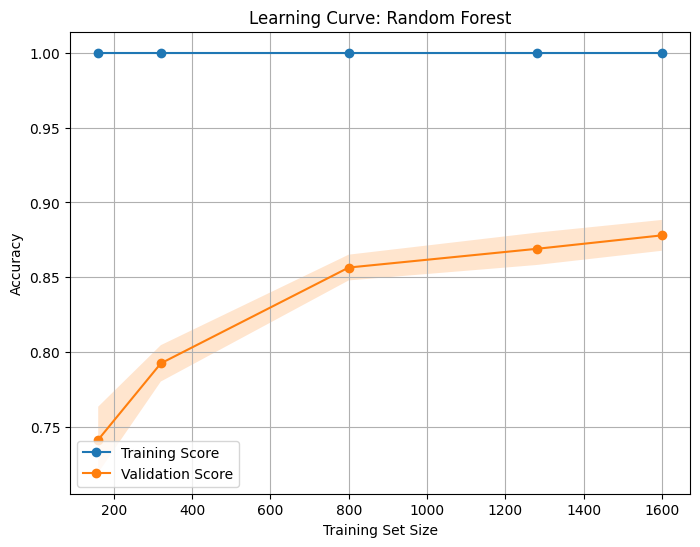

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df1.drop(columns=["price_range"])
y = df1["price_range"]

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=[0.1, 0.2, 0.5, 0.8, 1.0], random_state=42
)

# Calculate mean and std for training and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Score", marker='o')

# Fill the std deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Labels and legend
plt.title("Learning Curve: Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df1.drop(columns=["price_range"])
y = df1["price_range"]

# Train Random Forest for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Select features with importance > 5%
selected_features = feature_importance[feature_importance > 0.05].index

# Drop less important features
X_reduced = X[selected_features]

# Display reduced dataset and important features
print("Selected Features:", selected_features.tolist())
print("Reduced Dataset Shape:", X_reduced.shape)

Selected Features: ['battery_power', 'px_height', 'px_width', 'ram']
Reduced Dataset Shape: (2000, 4)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use only the selected features
X_reduced = df1[['battery_power', 'px_height', 'px_width', 'ram']]
y = df1["price_range"]

# Split reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest with reduced features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies and errors
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Results
print("Train Accuracy:", train_accuracy)
print("Train Error:", train_error)
print("Test Accuracy:", test_accuracy)
print("Test Error:", test_error)

Train Accuracy: 1.0
Train Error: 0.0
Test Accuracy: 0.94
Test Error: 0.06000000000000005


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use only selected features
X_reduced = df1[['battery_power', 'px_height', 'px_width', 'ram']]
y = df1["price_range"]

# Split reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Apply Regularization
model = RandomForestClassifier(
    random_state=42,
    max_depth=10,                 # Limit depth of each tree
    min_samples_split=10,         # Minimum samples to split a node
    min_samples_leaf=5,           # Minimum samples in a leaf
    n_estimators=100              # Number of trees in the forest
)

# Train the model
model.fit(X_train, y_train)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies and errors
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

# Results
print("Train Accuracy with Regularization:", train_accuracy)
print("Train Error with Regularization:", train_error)
print("Test Accuracy with Regularization:", test_accuracy)
print("Test Error with Regularization:", test_error)

Train Accuracy with Regularization: 0.971875
Train Error with Regularization: 0.028124999999999956
Test Accuracy with Regularization: 0.925
Test Error with Regularization: 0.07499999999999996


In [21]:
data1 = pd.read_csv('/content/credit_dataset.csv')
data2 = pd.read_csv('/content/heart.csv')

In [22]:
data1.head(2)

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [24]:
# Calculate percentage distribution of the target column
target_column = 'TARGET'  # Replace with your actual target column name
distribution = data1[target_column].value_counts(normalize=True) * 100

# Display the distribution
print("Percentage distribution of target column:")
print(distribution)

# Check for imbalance
threshold = 20  # Example threshold for imbalance (modify as needed)
if any(distribution < threshold):
    print("\nThe dataset is imbalanced because one or more classes have less than {}% of the data.".format(threshold))
else:
    print("\nThe dataset is balanced.")

Percentage distribution of target column:
TARGET
0    98.320999
1     1.679001
Name: proportion, dtype: float64

The dataset is imbalanced because one or more classes have less than 20% of the data.
